In [1]:
# using widgets & images
import ipywidgets as widgets
from IPython.display import display, Image, clear_output, HTML
import time
import random
from jupyter_ui_poll import ui_events

# using panda & json
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
# using bottoms
event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            ui_poll(n_proc)

            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False

            time.sleep(interval)

    return event_info

def register_btn_event(btn):
    event_info['type'] = "button click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return

In [3]:
# send to google form
import requests
from bs4 import BeautifulSoup
import json

def send_to_google_form(data_dict, form_url):
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

In [9]:
# picture without any dots
pic_blank = Image("0-0.png",width = 450)
# 8 pictures blue:yellow dots 0-8
pic0 = Image("14b-12y.png", width = 450)
pic1 = Image("12b-16y.png", width = 450)
pic2 = Image("18b-20y.png", width = 450)
pic3 = Image("20b-15y.png", width = 450)
pic4 = Image("21b-18y.png", width = 450)
pic5 = Image("12b-9y.png", width = 450)
pic6 = Image("16b-18y.png", width = 450)
pic7 = Image("9b-10y.png", width = 450)

piclist_by = [pic0,pic1,pic2,pic3,pic4,pic5,pic6,pic7]
number_by = [0,1,2,3,4,5,6,7]
answer_by = ["left","right","right","left","left","left","right","right"]
nL_by = [14,12,18,20,21,12,16,9]   # no. of dots at left side
nR_by = [12,16,20,15,18,9,18,10]
cL_by = ["b"]*8                    # dots'colour at left side
cR_by = ["y"]*8

# 8 pictures blue:blue dots 8-15
pic8 = Image("12b-16b.png", width = 450)
pic9 = Image("12b-9b.png", width = 450)
pic10 = Image("20b-15b.png", width = 450)
pic11 = Image("18b-20b.png", width = 450)
pic12 = Image("16b-18b.png", width = 450)
pic13 = Image("21b-18b.png", width = 450)
pic14 = Image("14b-12b.png", width = 450)
pic15 = Image("9b-10b.png", width = 450)

piclist_bb = [pic8,pic9,pic10,pic11,pic12,pic13,pic14,pic15]
number_bb = [8,9,10,11,12,13,14,15]
answer_bb = ["right","left","left","right","right","left","left","right"]
nL_bb = [12,12,20,18,16,21,14,9]
nR_bb = [16,9,15,20,18,18,12,10]
cL_bb = ["b"]*8
cR_bb = ["b"]*8

# 8 pictures yellow:yellow dots 16-23
pic16 = Image("16y-12y.png", width = 450)
pic17 = Image("9y-12y.png", width = 450)
pic18 = Image("15y-20y.png", width = 450)
pic19 = Image("20y-18y.png", width = 450)
pic20 = Image("18y-16y.png", width = 450)
pic21 = Image("18y-21y.png", width = 450)
pic22 = Image("12y-14y.png", width = 450)
pic23 = Image("10y-9y.png", width = 450)

piclist_yy = [pic16,pic17,pic18,pic19,pic20,pic21,pic22,pic23]
number_yy = [16,17,18,19,20,21,22,23]
answer_yy = ["left","right","right","left","left","right","right","left"]
nL_yy = [16,9,15,20,18,18,12,10]
nR_yy = [12,12,20,18,16,21,14,9]
cL_yy = ["y"]*8
cR_yy = ["y"]*8

# 8 pictures yellow:blue dots 24-31
pic24 = Image("12y-16b.png", width = 450)
pic25 = Image("12y-9b.png", width = 450)
pic26 = Image("20y-15b.png", width = 450)
pic27 = Image("18y-20b.png", width = 450)
pic28 = Image("16y-18b.png", width = 450)
pic29 = Image("21y-18b.png", width = 450)
pic30 = Image("14y-12b.png", width = 450)
pic31 = Image("9y-10b.png", width = 450)

piclist_yb = [pic24,pic25,pic26,pic27,pic28,pic29,pic30,pic31]
number_yb = [24,25,26,27,28,29,30,31]
answer_yb = ["right","left","left","right","right","left","left","right"]
nL_yb = [12,12,20,18,16,21,14,9]
nR_yb = [16,9,15,20,18,18,12,10]
cL_yb = ["y"]*8
cR_yb = ["b"]*8

# create 64 trials
number = (number_by + number_bb + number_yy + number_yb)*2
piclist = (piclist_by + piclist_bb + piclist_yy + piclist_yb)*2
answer = (answer_by + answer_bb + answer_yy + answer_yb)*2
nL = (nL_by + nL_bb + nL_yy + nL_yb)*2
nR = (nR_by + nR_bb + nR_yy + nR_yb)*2
cL = (cL_by + cL_bb + cL_yy + cL_yb)*2
cR = (cR_by + cR_bb + cR_yy + cR_yb)*2



In [34]:
# run the ANS test

## before run the test
### add a data consent disclaimer 
data_consent_info = """DATA CONSENT INFORMATION:

Please read:

we wish to record your response data to an anonymised public data repository.

Your data will be used for educational teaching purposes practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload."""

print(data_consent_info)

result = input("> ")
if result == "yes":
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
    clear_output(wait=False)
else:
    # end code execution by raising an exception
    raise(Exception("User did not consent to continue test."))

## run the test
### basic information of respondents
print("Welcome to the ANS test! This is a test assessing your reaction time.")
time.sleep(1)

#### record the user_id
id_instructions = """
Please enter your anonymised ID.

To generate an anonymous 4-letter unique user identifier please enter:
- two letters based on the initials (first and last name) of a childhood friend
- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise
then your unique identifer would be CBTC

"""
print(id_instructions)

user_id = input("> ")
print("User entered id:", user_id)
clear_output(wait=False)

print("Please enter your age:")
age = input("> ")
clear_output(wait=False)
    
print("Please enter your gender (m/f):")
gender = input("> ")
clear_output(wait=False)

### record the basic information & send to the google form later
data_dict= {
    'user_id': user_id,
    'age': age,
    'gender': gender,
}

### create an empty dict to record the result in detail 
results_dict = {
    'filename': [],
    'nL': [],
    'nR': [],
    'ratio': [],
    'correct': [],
    'cL':[],
    'cR':[],
    'response_time':[]
}

### function record the result that could be send to the google form later
def record_result(filename, nL, nR, ratio, correct, cL, cR, response_time):
    results_dict['filename'].append(filename)
    results_dict['nL'].append(nL)
    results_dict['nR'].append(nR)
    results_dict['ratio'].append(ratio)
    results_dict['correct'].append(correct)
    results_dict['cL'].append(cL)
    results_dict['cR'].append(cR)
    results_dict['response_time'].append(response_time)


## test starts
print("The following image will be shown for 0.75s then removed from view")
time.sleep(1)

print("You need to state which side had more dots (right/left) as soon as possible")
time.sleep(2)

## set the bottom widget
top_area = widgets.Output(layout={"height":"60px"})
main_area = widgets.Output(layout={"height":"110px"})
bottom_area = widgets.Output(layout={"height":"60px"})

btn1 = widgets.Button(description="left")  
btn2 = widgets.Button(description="right")  

btn1.on_click(register_btn_event)
btn2.on_click(register_btn_event)

panel = widgets.HBox([btn1, btn2])

top_area.append_display_data( HTML("<h3>Which side has more dots?</h3>") ) 
bottom_area.append_display_data(panel)

display(top_area)
display(main_area)
display(bottom_area)

n = len(piclist) # piclist
score = 0

## copy the list to shuffle
number_1 = number.copy()
random.seed(1)
random.shuffle(number_1)

## running the test with bottom & recording the data
for i in range(len(number_1)):
    with main_area: display(piclist[number_1[i]])
    start_time = time.time()

    ### image will disappear after 0.75s
    wait_for_event(timeout=0.75)
    with main_area: clear_output(wait=True)
    with main_area: display(pic_blank)
        
    result = wait_for_event(timeout=3)

    ### record response as NA
    if result['description'] == '':
        with main_area: clear_output()
        with main_area: display("Too slow!")
        time_taken = 0
        record_result(f"pic{number_1[i]}.png", nL[number_1[i]], nR[number_1[i]], nL[number_1[i]]/nR[number_1[i]], f"NA", cL[number_1[i]], cR[number_1[i]], time_taken)
    ### record response as correct "1"
    elif result['description'] ==  answer[i]:
        score = score + 1
        end_time = time.time()
        time_taken = end_time - start_time 
        record_result(f"pic{number_1[i]}.png", nL[number_1[i]], nR[number_1[i]], nL[number_1[i]]/nR[number_1[i]], 1, cL[number_1[i]], cR[number_1[i]],time_taken)
    ### record response as incorrect "0"
    else:
        end_time = time.time()
        time_taken = end_time - start_time 
        record_result(f"pic{number_1[i]}.png", nL[number_1[i]], nR[number_1[i]], nL[number_1[i]]/nR[number_1[i]], 0, cL[number_1[i]], cR[number_1[i]],time_taken)
    
    wait_for_event(timeout=0.75)
    with main_area: clear_output()   
        
with bottom_area: clear_output()

with main_area: print(f"You scored {score}. Well done! Thank you for your time :)")


## change the dict into json
results_df = pd.DataFrame(results_dict)
data_dict['results_json'] = results_df.to_json()

## send to google form
form_url = "https://docs.google.com/forms/d/e/1FAIpQLSdu6kmrYPpR_pi2htgQROxbnjnP___0_U-doAobSAkzAYddYA/viewform?usp=sf_link"
send_to_google_form(data_dict, form_url)


The following image will be shown for 0.75s then removed from view
You need to state which side had more dots (right/left) as soon as possible


Output(layout=Layout(height='60px'), outputs=({'output_type': 'display_data', 'data': {'text/plain': '<IPython…

Output(layout=Layout(height='110px'))

Output(layout=Layout(height='60px'), outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(chi…

True

In [35]:
results_df

,filename,nL,nR,ratio,correct,cL,cR,response_time
0,pic3.png,20,15,1.333333,NA,b,y,0.000000
1,pic6.png,16,18,0.888889,NA,b,y,0.000000
2,pic1.png,12,16,0.750000,1,b,y,1.017850
3,pic5.png,12,9,1.333333,0,b,y,1.672787
4,pic7.png,9,10,0.900000,0,b,y,0.846284
5,pic0.png,14,12,1.166667,1,b,y,1.281458
6,pic4.png,21,18,1.166667,NA,b,y,0.000000
7,pic2.png,18,20,0.900000,1,b,y,1.105306


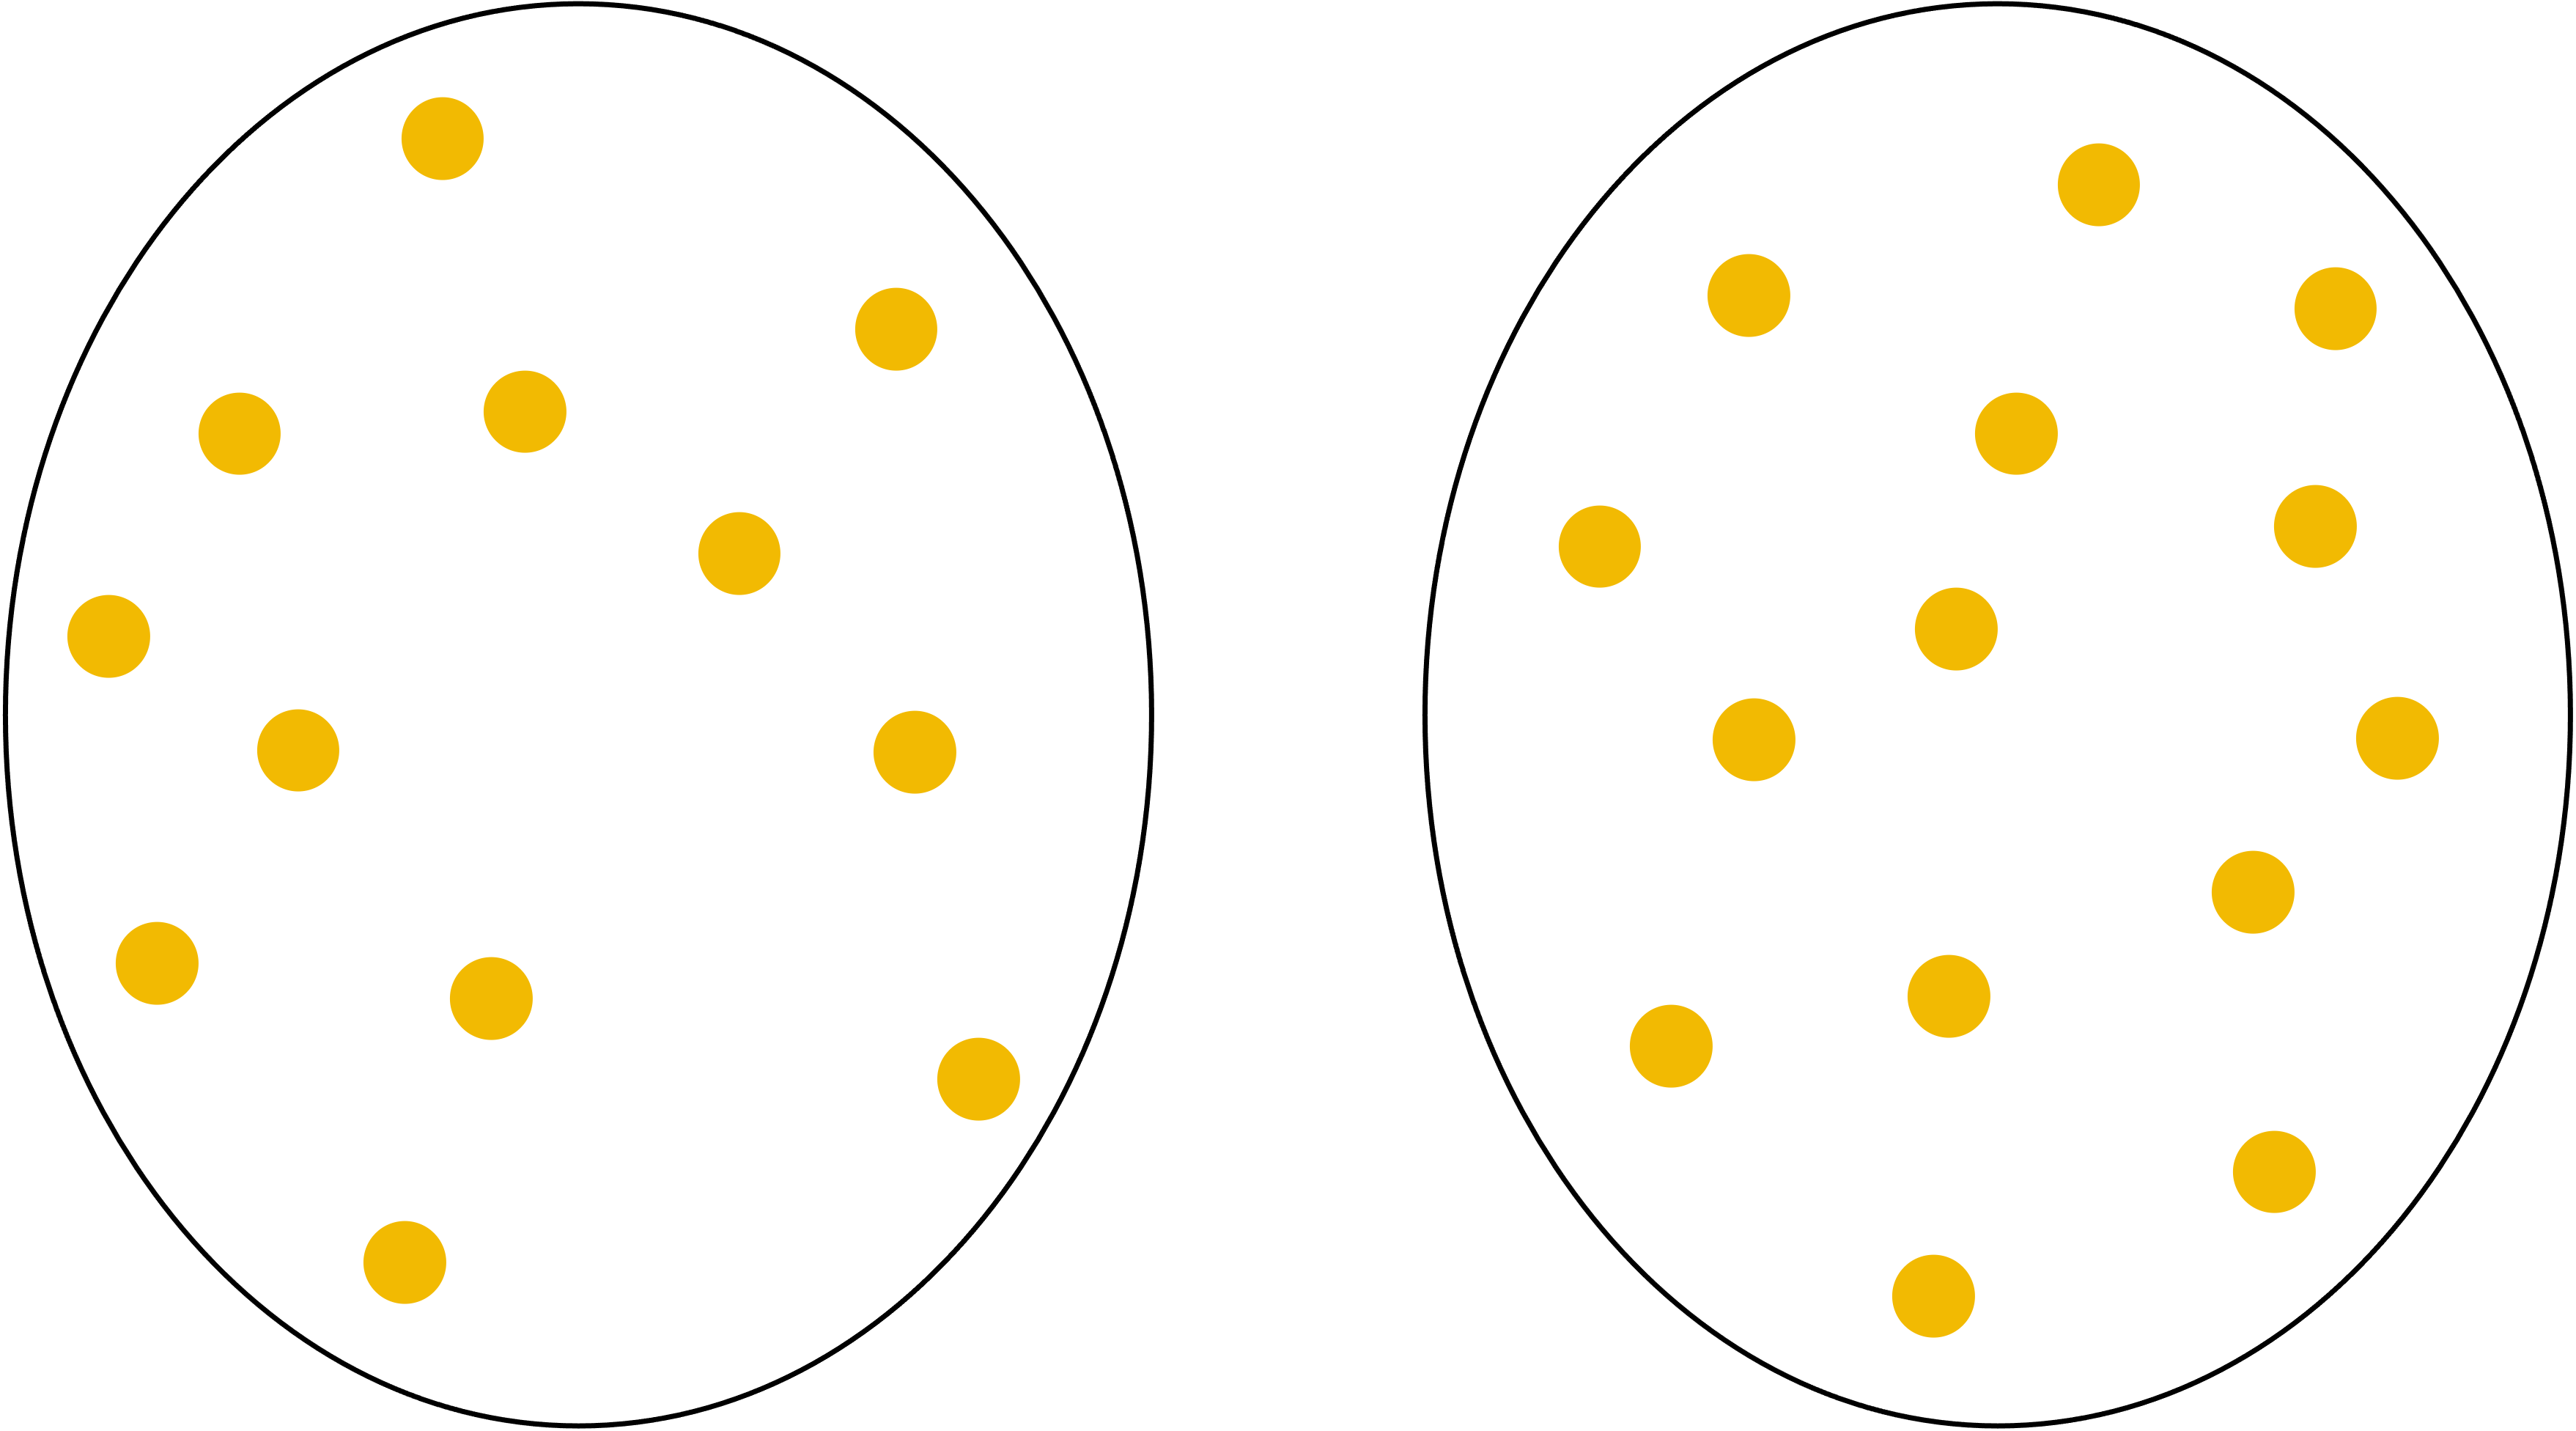

In [29]:
pic22